In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse=pd.read_csv(mouse_file)
mouse.head()
clinical=pd.read_csv(clinical_file)
clinical.head()

# Combine the data into a single dataset
combine=pd.merge(mouse, clinical, how= "outer", on ="Mouse ID")
#combine_df=pd.DataFrame(combine)


# Display the data table for preview

combine.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol=combine.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
print(tumor_vol.head())


# Convert to DataFrame
tumor_frame=pd.DataFrame(tumor_vol)
# Preview DataFrame
tumor_frame.head()

        Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error=combine.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()


# Convert to DataFrame
error_df=pd.DataFrame(error)
# Preview DataFrame
error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

mung=tumor_frame.pivot(index= 'Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)')
    

# Preview that Reformatting worked
mung.head()  

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
new=mung[['Capomulin','Infubinol','Ketapril','Placebo']]
new.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


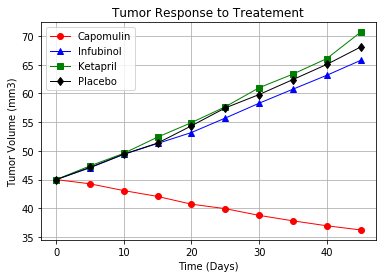

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
plt.xlim=np.arange(-2,45,10)
plt.ylim=np.arange(32,76,5)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
 
plt.plot(new['Capomulin'], linewidth=1, marker='o', color= 'red', label= 'Capomulin')   
plt.plot(new['Infubinol'], linewidth=1, marker='^', color= 'blue', label= 'Infubinol')
plt.plot(new['Ketapril'], linewidth=1, marker='s', color= 'green', label= 'Ketapril')
plt.plot(new['Placebo'], linewidth=1, marker='d', color= 'black', label= 'Placebo')
     
plt.legend()

plt.title('Tumor Response to Treatement')

plt.grid(b=None, which='major', axis='both')


# Save the Figure
plt.show()
#plt.plot.grid()

plt.savefig("data/tumor_response.png")
#plt.plot(mung, linewidth=0, marker="^", color="red")


## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site= combine.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
met_site.head()

#Metastatic Sites
# Convert to DataFrame
met_df=pd.DataFrame(met_site)
# Preview DataFrame

met_df.head().reset_index()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error= combine.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
met_error
# Convert to DataFrame
met2_df=pd.DataFrame(met_error)
# Preview DataFrame
met2_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames

new_met2= met_df.reset_index().pivot(index= 'Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
new_met2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


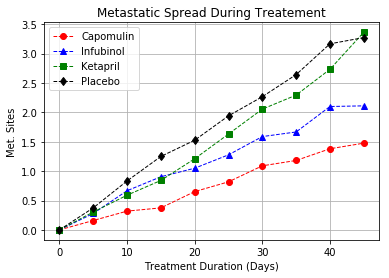

In [11]:

# Generate the Plot (with Error Bars)
plt.xlim=np.arange(-2,45,10)
plt.ylim=np.arange(-0.25,4,0.5)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')

plt.plot(new_met2['Capomulin'], '--', linewidth=1,marker='o', color= 'red', label= 'Capomulin')   
plt.plot(new_met2['Infubinol'], '--', linewidth=1, marker='^', color= 'blue', label= 'Infubinol')
plt.plot(new_met2['Ketapril'], '--',linewidth=1, marker='s', color= 'green', label= 'Ketapril')
plt.plot(new_met2['Placebo'],'--', linewidth=1, marker='d', color= 'black', label= 'Placebo')
     
plt.legend()

plt.title('Metastatic Spread During Treatement')

plt.grid(b=None, which='major', axis='both')



# Save the Figure
plt.savefig("Data/metastatic.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

count=combine.groupby(['Drug','Timepoint'])['Mouse ID'].count()
count
# Convert to DataFrame
count_df=pd.DataFrame(count).reset_index()
# Preview DataFrame
count_df.head()

new_count=count_df.rename(columns={"Drug":"Drug", "Timepoint":"Timepoint","Mouse ID":"Mouse Count"})
new_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mungg=new_count.pivot(index='Timepoint', columns= 'Drug', values= 'Mouse Count')

# Preview the Data Frame
mungg.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
mungg.loc[:,'Capomulin':]= mungg.loc[:,'Capomulin':].div(mungg.iloc[0]['Capomulin':]/100)
mungg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


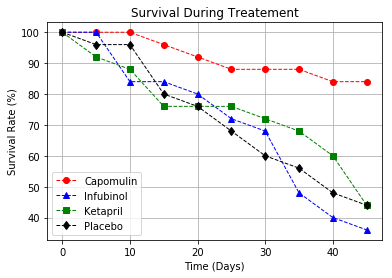

In [15]:

# Generate the Plot (with Error Bars)
plt.xlim=np.arange(-2,45,10)
plt.ylim=np.arange(30,103,10)
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
  
plt.plot(mungg['Capomulin'], '--', linewidth=1,marker='o', color= 'red', label= 'Capomulin')   
plt.plot(mungg['Infubinol'], '--', linewidth=1, marker='^', color= 'blue', label= 'Infubinol')
plt.plot(mungg['Ketapril'], '--',linewidth=1, marker='s', color= 'green', label= 'Ketapril')
plt.plot(mungg['Placebo'],'--', linewidth=1, marker='d', color= 'black', label= 'Placebo')
    
plt.legend()

plt.title('Survival During Treatement')

plt.grid(b=None, which='major', axis='both')


# Save the Figure
plt.savefig("Data/survival.png")
# Show the Figure
plt.show()


## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
change=tumor_frame.groupby(['Drug']).apply(lambda x: ((x.iloc[-1] - x.iloc[0])/x.iloc[0])*100)[["Tumor Volume (mm3)"]]

# Display the data to confirm
change

,Tumor Volume (mm3)
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


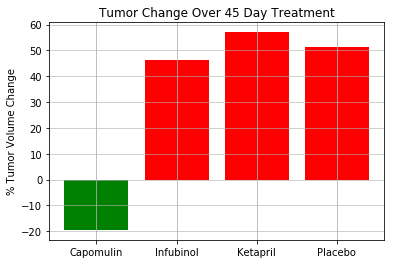

In [19]:
# Store all Relevant Percent Changes into a Tuple
#This code uses a tuple and generates a graph with the four requested drugs. 
tup_keys = ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
tup_values = (change.loc['Capomulin', 'Tumor Volume (mm3)'],
change.loc['Infubinol', 'Tumor Volume (mm3)'], 
change.loc['Ketapril', 'Tumor Volume (mm3)'],
change.loc['Placebo', 'Tumor Volume (mm3)'])
plt.bar(tup_keys, tup_values, color=("green", "red", "red", "red"))

plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')

plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=1.0)
# Save the Figure

plt.savefig("Data/bar_4drugs.png")

plt.show()


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Show the Figure


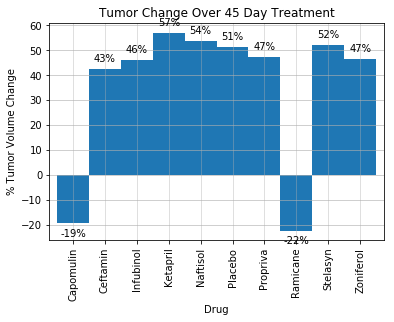

In [20]:
#This one gives the percents, but I couldn't figure out how to remove the bars for the extra drugs.

ax=change["Tumor Volume (mm3)"].plot(kind="bar", width=1.0,)
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')

plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=1.5)

def add_value_labels(ax, spacing=5):
   
    for rect in ax.patches:
       
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
        space = spacing
       
        va = 'bottom'
       
        if y_value < 0:
          
            space *= -1
           
            va = 'top'
      
        label = "{:.0f}%".format(y_value)
       
        ax.annotate(
            label,                     
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
add_value_labels(ax)

# Orient widths. Add labels, tick marks, etc. 

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("Data/bar_all_drugs.png")

# Show the Figure
plt.show()
